In [ ]:
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model1 = Sequential([
Conv2D(10, 5, input_shape=(28, 28, 1), activation='relu', padding='same'), # 5*5*10*1+10
MaxPool2D(),
Conv2D(20, 5, activation='relu', padding='same'), # 10*5*5*20 + 20
MaxPool2D(),
Flatten(),
Dense(100, activation='relu'), # 980*100 + 100
Dense(10, activation='softmax') # 100*10 + 10
])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 10)        260       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 20)        5020      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 980)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               98100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

## **텍스트 분류**

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [ ]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [ ]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
train_data[10][:10]

[1, 785, 189, 438, 47, 110, 142, 7, 6, 7475]

In [ ]:
len(train_data[0])

218

In [ ]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [ ]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [ ]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
vocab_size = 10000

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(vocab_size, 16))
model2.add(keras.layers.GlobalAveragePooling1D())
model2.add(keras.layers.Dense(16, activation='relu'))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data[0], train_data[1]

(array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
        4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
         838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
           4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
        1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
         147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
          71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
           4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
          62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
          16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
           5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
          22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
           2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
        3766,    5,  723,   36,   71, 

In [ ]:
layer1 = tf.keras.layers.Embedding(vocab_size, 16)

In [ ]:
x1 = layer1(np.array([train_data[0]]))
x2 = layer1(np.array([train_data[1]]))

In [ ]:
x1[0][0]==x2[0][0]

<tf.Tensor: shape=(16,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])>

In [ ]:
x1[0][1]==x2[0][32]

<tf.Tensor: shape=(16,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])>

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 0s 15ms/step - loss: 0.3693 - accuracy: 0.8794 - val_loss: 0.3894 - val_accuracy: 0.8559
Epoch 2/40
30/30 [==============================] - 0s 14ms/step - loss: 0.3411 - accuracy: 0.8867 - val_loss: 0.3692 - val_accuracy: 0.8606
Epoch 3/40
30/30 [==============================] - 0s 14ms/step - loss: 0.3175 - accuracy: 0.8924 - val_loss: 0.3520 - val_accuracy: 0.8676
Epoch 4/40
30/30 [==============================] - 0s 14ms/step - loss: 0.2969 - accuracy: 0.8996 - val_loss: 0.3389 - val_accuracy: 0.8706
Epoch 5/40
30/30 [==============================] - 0s 14ms/step - loss: 0.2795 - accuracy: 0.9042 - val_loss: 0.3281 - val_accuracy: 0.8732
Epoch 6/40
30/30 [==============================] - 0s 14ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.3193 - val_accuracy: 0.8753
Epoch 7/40
30/30 [==============================] - 0s 14ms/step - loss: 0.2501 - accuracy: 0.9137 - val_loss: 0.3123 - val_accuracy: 0.8775
Epoch 8/40
30

In [ ]:
results = model2.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 1s - loss: 0.4243 - accuracy: 0.8413
[0.42430222034454346, 0.8412799835205078]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

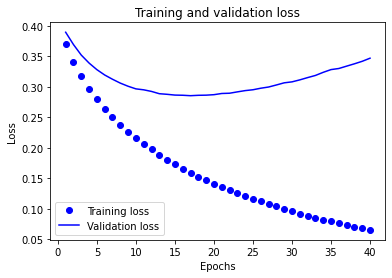

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

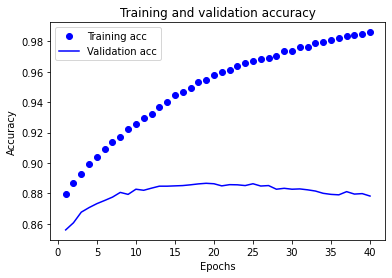

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## **RNN, LSTM**

**tanh**

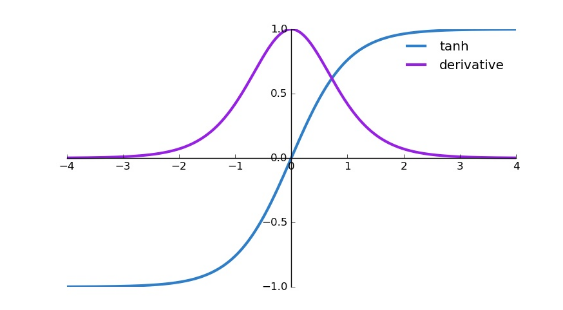

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16), # 10000*16
    tf.keras.layers.LSTM(32), # 4 * ((32+16) * 32 +32) 
    tf.keras.layers.Dense(16, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6272      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 166,817
Trainable params: 166,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 31s 46ms/step - loss: 0.6930 - accuracy: 0.5102 - val_loss: 0.6922 - val_accuracy: 0.5147
Epoch 2/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6899 - accuracy: 0.5380 - val_loss: 0.6682 - val_accuracy: 0.5914
Epoch 3/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6669 - accuracy: 0.6066 - val_loss: 0.5453 - val_accuracy: 0.7623
Epoch 4/10
30/30 [==============================] - 1s 29ms/step - loss: 0.5857 - accuracy: 0.6846 - val_loss: 0.5817 - val_accuracy: 0.7756
Epoch 5/10
30/30 [==============================] - 1s 29ms/step - loss: 0.4916 - accuracy: 0.8066 - val_loss: 0.4299 - val_accuracy: 0.8313
Epoch 6/10
30/30 [==============================] - 1s 29ms/step - loss: 0.3734 - accuracy: 0.8694 - val_loss: 0.3775 - val_accuracy: 0.8564
Epoch 7/10
30/30 [==============================] - 1s 34ms/step - loss: 0.2970 - accuracy: 0.9026 - val_loss: 0.3421 - val_accuracy: 0.8668
Epoch 8/10
3

In [ ]:
results = model3.evaluate(test_data,  test_labels, verbose=2)
print(results)

782/782 - 3s - loss: 0.3751 - accuracy: 0.8643
[0.3750993311405182, 0.8643199801445007]


## **실기 6번**

1. 100만개의 단어를 대상으로 함
2. padding을 위한 '[PAD]'와 vocabulary 외의 단어를 처리하는 '[OOV]'를 포함하여 vovabulary 구성
3. vocabulary의 각 단어는 길이 32인 벡터로 임베딩하여 사용
4. 임베딩 이후 layer는 unit size=50인 LSTM과 output을 위한 dense layer로 구성(6개 class, softmax 사용)

In [ ]:
import tensorflow as tf

model_rnn_1 = tf.keras.Sequential([
    ##### 이 부분에 코드를 작성하시오 #####           
    tf.keras.layers.Embedding(1000002, 32),
    tf.keras.layers.LSTM(50), 
    tf.keras.layers.Dense(6, activation='softmax')
    #######################################
])  
model_rnn_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000064  
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 306       
Total params: 32,016,970
Trainable params: 32,016,970
Non-trainable params: 0
_________________________________________________________________


1. LSTM layer 하나 추가(unit size=50)
2. 최대 문장의 길이 25로 제한
3. 문장 길이가 25 이상일 경우 뒷부분 삭제

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

''' 모델 개선하기 '''
model_rnn_2 = tf.keras.Sequential([
    ##### 이 부분에 코드를 작성하시오 #####           
    tf.keras.layers.Embedding(1000002, 32),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(6, activation='softmax')
    #######################################
])  

model_rnn_2.summary()

''' 
민원 문장 자르기 처리하기
'''
minwon_ids = [[123, 124, 346, 76, 66, 1221, 8762, 4574, 66, 1, 7, 999, 2, 4, 98685, 52, 10, 40, 124, 127, 789654, 27, 122, 9, 1991, 4, 8, 15, 16, 23, 42]] 

minwon_ids_result = pad_sequences(minwon_ids, maxlen=25, truncating='post')    # 빈칸에 들어갈 코드를 작성하세요

print(minwon_ids_result)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000064  
_________________________________________________________________
lstm (LSTM)                  (None, None, 50)          16600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 6)                 306       
Total params: 32,037,170
Trainable params: 32,037,170
Non-trainable params: 0
_________________________________________________________________
[[   123    124    346     76     66   1221   8762   4574     66      1
       7    999      2      4  98685     52     10     40    124    127
  789654     27    122      9   1991]]
